[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


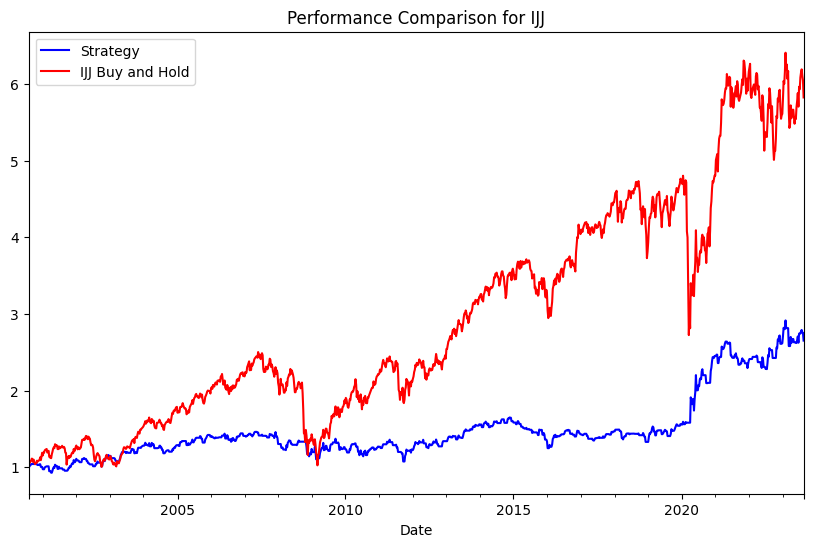

For IJJ:
Strategy: CAGR: 4.32%, Max Drawdown: -26.41%, Sharpe Ratio: 1.00
IJJ Buy and Hold: CAGR: 7.94%, Max Drawdown: -59.03%, Sharpe Ratio: 1.23
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


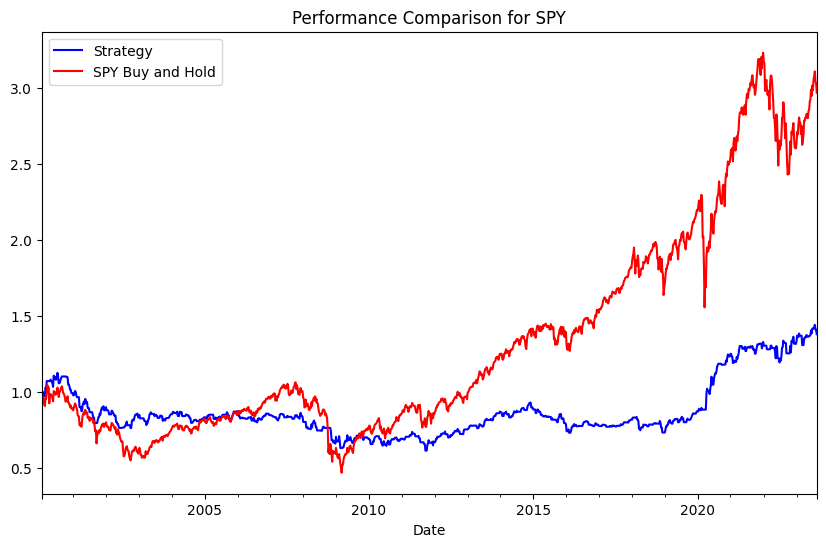

For SPY:
Strategy: CAGR: 1.38%, Max Drawdown: -45.42%, Sharpe Ratio: 0.47
SPY Buy and Hold: CAGR: 4.72%, Max Drawdown: -55.91%, Sharpe Ratio: 0.92
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


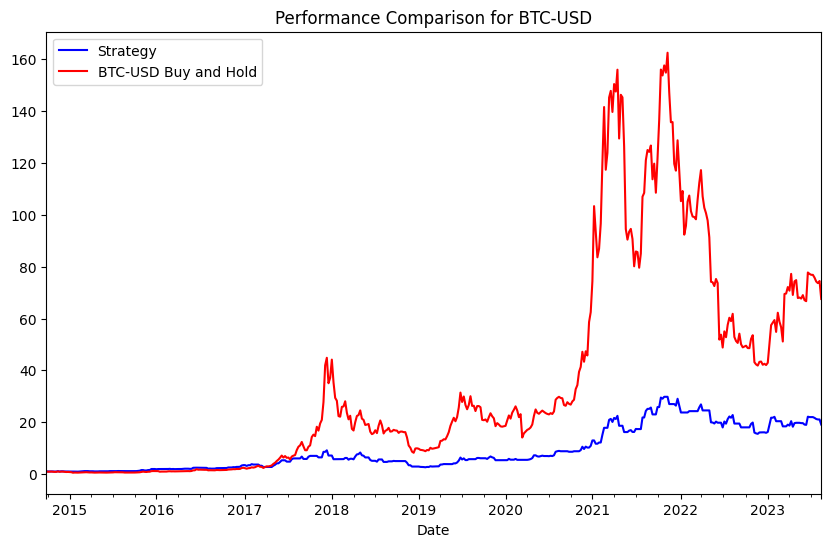

For BTC-USD:
Strategy: CAGR: 39.31%, Max Drawdown: -71.32%, Sharpe Ratio: 2.42
BTC-USD Buy and Hold: CAGR: 60.55%, Max Drawdown: -81.69%, Sharpe Ratio: 2.68
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


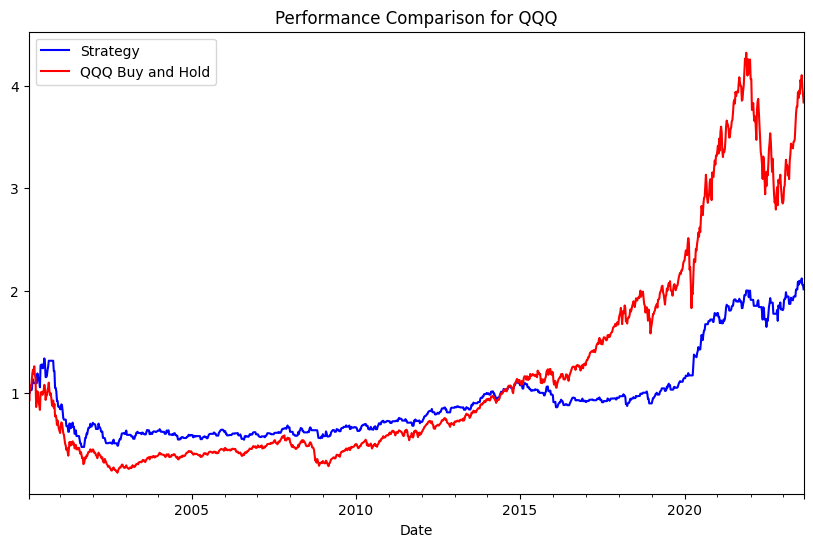

For QQQ:
Strategy: CAGR: 3.01%, Max Drawdown: -64.82%, Sharpe Ratio: 0.69
QQQ Buy and Hold: CAGR: 5.87%, Max Drawdown: -82.69%, Sharpe Ratio: 0.94
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


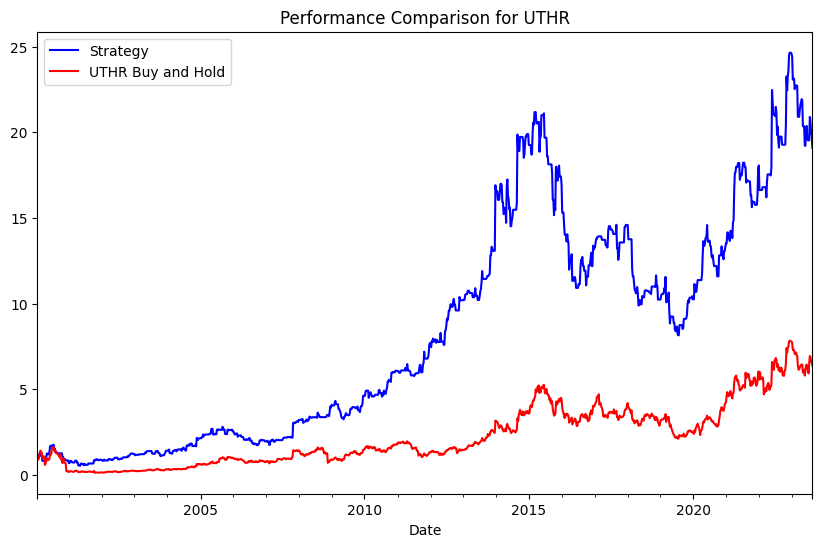

For UTHR:
Strategy: CAGR: 13.32%, Max Drawdown: -69.60%, Sharpe Ratio: 1.44
UTHR Buy and Hold: CAGR: 8.17%, Max Drawdown: -92.33%, Sharpe Ratio: 1.12
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


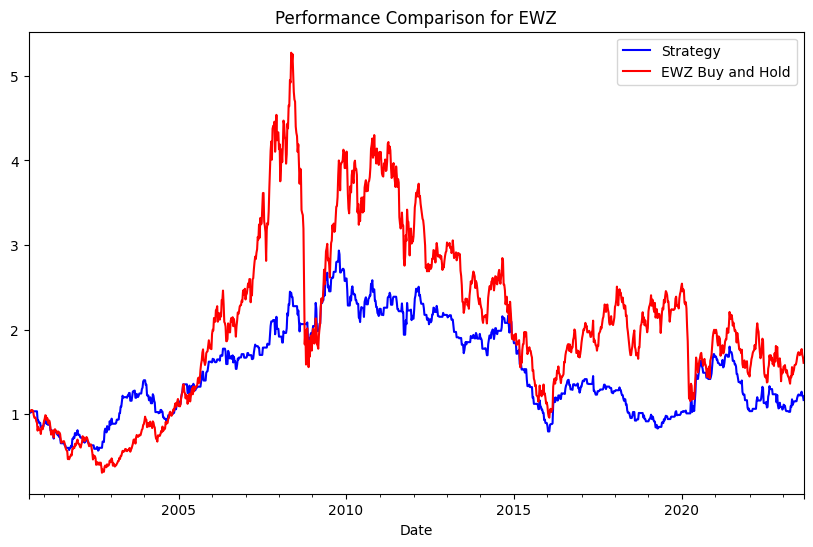

For EWZ:
Strategy: CAGR: 0.67%, Max Drawdown: -72.91%, Sharpe Ratio: 0.39
EWZ Buy and Hold: CAGR: 2.07%, Max Drawdown: -81.84%, Sharpe Ratio: 0.63
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


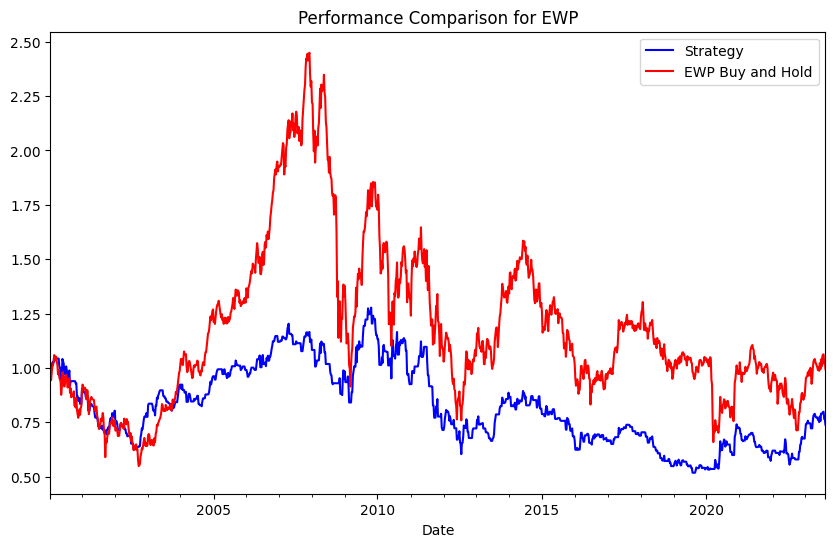

For EWP:
Strategy: CAGR: -1.28%, Max Drawdown: -59.43%, Sharpe Ratio: 0.03
EWP Buy and Hold: CAGR: -0.02%, Max Drawdown: -73.09%, Sharpe Ratio: 0.34
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


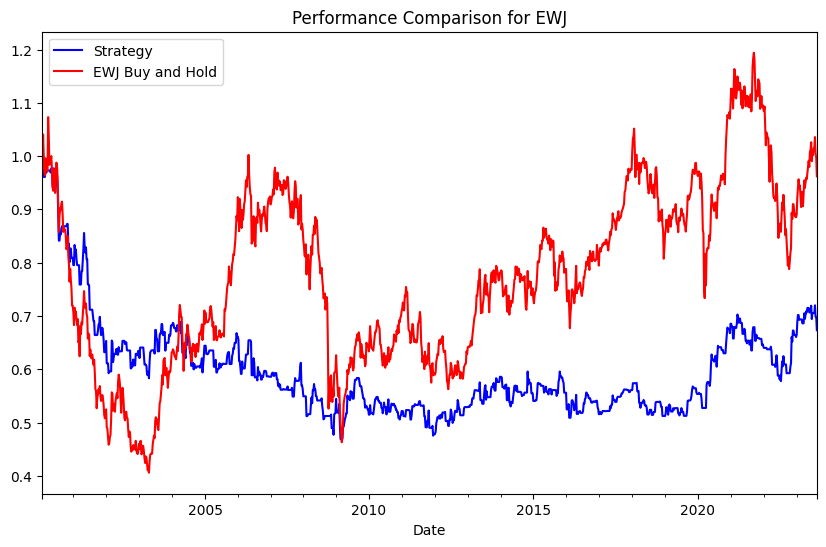

For EWJ:
Strategy: CAGR: -1.66%, Max Drawdown: -53.10%, Sharpe Ratio: -0.18
EWJ Buy and Hold: CAGR: -0.16%, Max Drawdown: -62.18%, Sharpe Ratio: 0.23
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


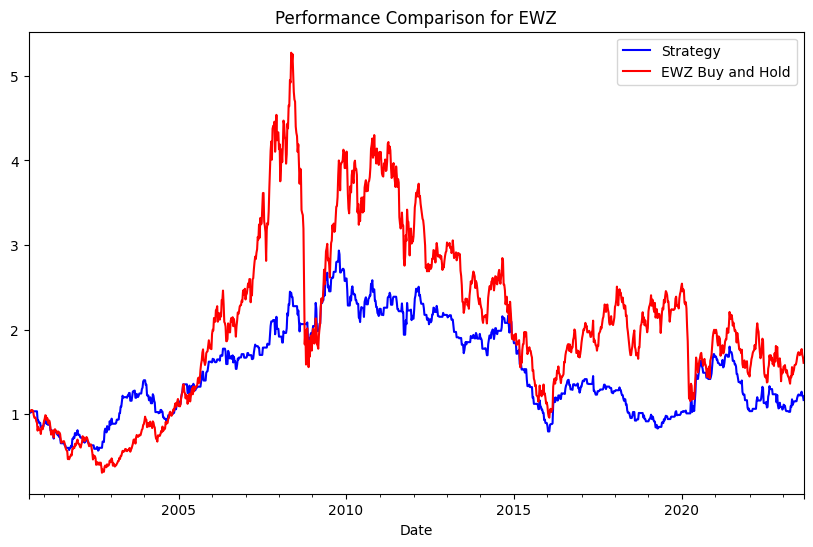

For EWZ:
Strategy: CAGR: 0.67%, Max Drawdown: -72.91%, Sharpe Ratio: 0.39
EWZ Buy and Hold: CAGR: 2.07%, Max Drawdown: -81.84%, Sharpe Ratio: 0.63
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


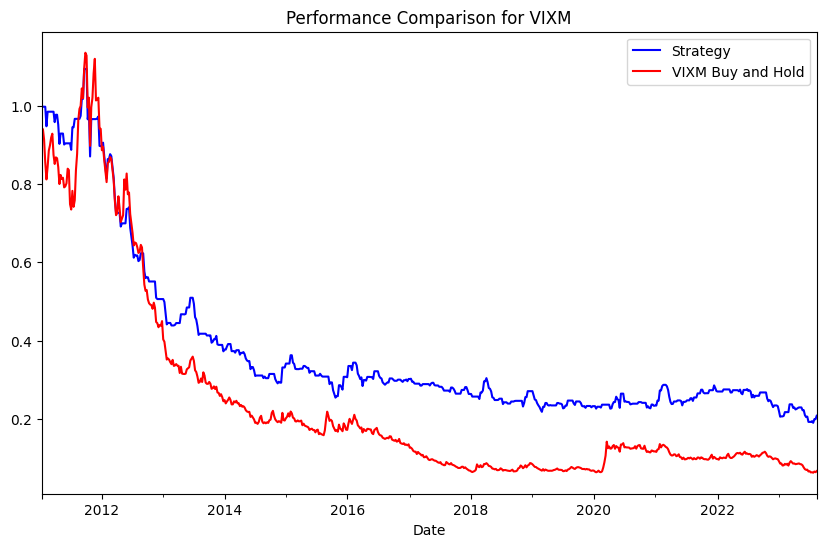

For VIXM:
Strategy: CAGR: -11.73%, Max Drawdown: -82.69%, Sharpe Ratio: -1.42
VIXM Buy and Hold: CAGR: -19.40%, Max Drawdown: -94.56%, Sharpe Ratio: -1.41
--------------------------------------------------


In [14]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Download the VIX data
vix_data = yf.download('^VIX', start="2000-01-01")['Close'].resample("W-FRI").last()
vix_data = pd.DataFrame(vix_data)
vix_data.columns = ['VIX']
vix_data['vix_sma_14'] = vix_data['VIX'].rolling(window=2).mean().shift(1)  # 14-day SMA for VIX shifted by 1 day

tickers = ['IJJ', 'SPY', 'BTC-USD', 'QQQ', 'UTHR', 'EWZ', 'EWP', 'EWJ', 'EWZ', 'VIXM']  # Tickers list

for ticker in tickers:
    # Download data for the ticker
    stock_data = yf.download(ticker, start=vix_data.index.min(), end=vix_data.index.max())
    stock_data = stock_data[['Close']].resample("W-FRI").last()

    # Merge the two dataframes
    data = stock_data.join(vix_data, how='inner')

    # Create a signal
    data['signal'] = np.where(data['VIX'] < data['vix_sma_14'], 1, 0)

    # Calculate strategy returns using the signal from the previous day
    data['strategy_returns'] = data['Close'].pct_change() * data['signal'].shift(1)
    data['stock_returns'] = data['Close'].pct_change()

    # Drop missing values
    data.dropna(inplace=True)

    # Plot the strategy and stock performance
    plt.figure(figsize=(10, 6))
    (data['strategy_returns'] + 1).cumprod().plot(label='Strategy', color='b')
    (data['stock_returns'] + 1).cumprod().plot(label=f'{ticker} Buy and Hold', color='r')
    plt.title(f'Performance Comparison for {ticker}')
    plt.legend()
    plt.show()

    # Annualizing factor assuming trading days
    annualizing_factor = 365

    # CAGR
    years = (data.index[-1] - data.index[0]).days / 365.0
    cagr_strategy = (1 + data['strategy_returns']).cumprod().iloc[-1] ** (1 / years) - 1
    cagr_stock = (1 + data['stock_returns']).cumprod().iloc[-1] ** (1 / years) - 1

    # Max Drawdown
    cumulative_returns_strategy = (1 + data['strategy_returns']).cumprod()
    rolling_max_strategy = cumulative_returns_strategy.expanding().max()
    daily_drawdown_strategy = cumulative_returns_strategy / rolling_max_strategy - 1
    max_drawdown_strategy = daily_drawdown_strategy.min()

    cumulative_returns_stock = (1 + data['stock_returns']).cumprod()
    rolling_max_stock = cumulative_returns_stock.expanding().max()
    daily_drawdown_stock = cumulative_returns_stock / rolling_max_stock - 1
    max_drawdown_stock = daily_drawdown_stock.min()

    # Sharpe Ratio (assuming risk-free rate to be 0)
    sharpe_ratio_strategy = np.mean(data['strategy_returns']) / np.std(data['strategy_returns']) * np.sqrt(annualizing_factor)
    sharpe_ratio_stock = np.mean(data['stock_returns']) / np.std(data['stock_returns']) * np.sqrt(annualizing_factor)

    # Printing the results
    print(f"For {ticker}:")
    print(f"Strategy: CAGR: {cagr_strategy:.2%}, Max Drawdown: {max_drawdown_strategy:.2%}, Sharpe Ratio: {sharpe_ratio_strategy:.2f}")
    print(f"{ticker} Buy and Hold: CAGR: {cagr_stock:.2%}, Max Drawdown: {max_drawdown_stock:.2%}, Sharpe Ratio: {sharpe_ratio_stock:.2f}")
    print("-" * 50)
